### Start from the dataset with column names, and the weights of instances have been dropped

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_excel('data/train_with_na.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   age               199523 non-null  int64 
 1   class_worker      199523 non-null  object
 2   det_ind_code      199523 non-null  int64 
 3   det_occ_code      199523 non-null  int64 
 4   education         199523 non-null  object
 5   wage_per_hour     199523 non-null  int64 
 6   hs_college        199523 non-null  object
 7   marital_stat      199523 non-null  object
 8   major_ind_code    199523 non-null  object
 9   major_occ_code    199523 non-null  object
 10  race              199523 non-null  object
 11  hisp_origin       199523 non-null  object
 12  sex               199523 non-null  object
 13  union_member      199523 non-null  object
 14  unemp_reason      199523 non-null  object
 15  full_or_part_emp  199523 non-null  object
 16  capital_gains     199523 non-null  int

Following is the summary for numerical features

In [5]:
data.describe()

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [6]:
#Detect the NA value
data.isna().sum()

age                     0
class_worker            0
det_ind_code            0
det_occ_code            0
education               0
wage_per_hour           0
hs_college              0
marital_stat            0
major_ind_code          0
major_occ_code          0
race                    0
hisp_origin             0
sex                     0
union_member            0
unemp_reason            0
full_or_part_emp        0
capital_gains           0
capital_losses          0
stock_dividends         0
tax_filer_stat          0
region_prev_res         0
state_prev_res        708
det_hh_fam_stat         0
det_hh_summ             0
mig_chg_msa         99696
mig_chg_reg         99696
mig_move_reg        99696
mig_same                0
mig_prev_sunbelt    99696
num_emp                 0
fam_under_18            0
country_father       6713
country_mother       6119
country_self         3393
citizenship             0
own_or_self             0
vet_question            0
vet_benefits            0
weeks_worked

/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

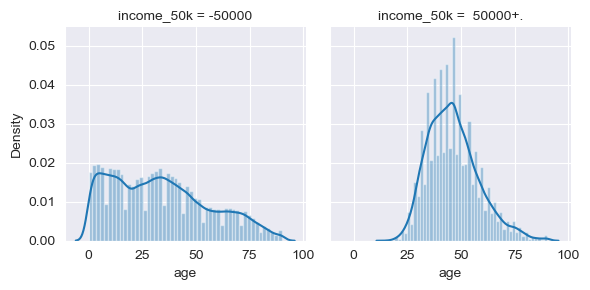

In [7]:
age_income_plot = sns.FacetGrid(data, col='income_50k')
age_income_plot = age_income_plot.map(sns.distplot, 'age')
plt.tight_layout()
plt.show()

Since our target is the last column, income_50k, which is in binary form. We transform it in binary form.

In [8]:
#data['income_50k'] = 1 * (data['income_50k'] == '50000.')

In [9]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['number']).columns
data_cat = data[cat_cols]
data_num = data[num_cols]

In [10]:
# Is any NA in the numerical variables
data_num.isna().sum()

age                0
det_ind_code       0
det_occ_code       0
wage_per_hour      0
capital_gains      0
capital_losses     0
stock_dividends    0
num_emp            0
own_or_self        0
vet_benefits       0
weeks_worked       0
year               0
dtype: int64

In [11]:
data_num.nunique()

age                  91
det_ind_code         52
det_occ_code         47
wage_per_hour      1240
capital_gains       132
capital_losses      113
stock_dividends    1478
num_emp               7
own_or_self           3
vet_benefits          3
weeks_worked         53
year                  2
dtype: int64

In [12]:
# Fill NA in the categorical variables
data_cat.isna().sum()

class_worker            0
education               0
hs_college              0
marital_stat            0
major_ind_code          0
major_occ_code          0
race                    0
hisp_origin             0
sex                     0
union_member            0
unemp_reason            0
full_or_part_emp        0
tax_filer_stat          0
region_prev_res         0
state_prev_res        708
det_hh_fam_stat         0
det_hh_summ             0
mig_chg_msa         99696
mig_chg_reg         99696
mig_move_reg        99696
mig_same                0
mig_prev_sunbelt    99696
fam_under_18            0
country_father       6713
country_mother       6119
country_self         3393
citizenship             0
vet_question            0
income_50k              0
dtype: int64

* We drop the missing value if the proportion of missing value is > 30%


In [13]:
NA_features_list = data.isna().sum()[data.isna().sum() != 0].index.tolist()
NA_features_drop = data.isna().sum()[data.isna().sum() / data.shape[0] >= 0.3].index.tolist()
data_cat = data_cat.drop(NA_features_drop, axis=1)
NA_features_list_remain = list(set(NA_features_list) - set(NA_features_drop))
NA_features_list_remain

['country_mother', 'country_self', 'country_father', 'state_prev_res']

In [14]:
data_cat.isna().sum()

class_worker           0
education              0
hs_college             0
marital_stat           0
major_ind_code         0
major_occ_code         0
race                   0
hisp_origin            0
sex                    0
union_member           0
unemp_reason           0
full_or_part_emp       0
tax_filer_stat         0
region_prev_res        0
state_prev_res       708
det_hh_fam_stat        0
det_hh_summ            0
mig_same               0
fam_under_18           0
country_father      6713
country_mother      6119
country_self        3393
citizenship            0
vet_question           0
income_50k             0
dtype: int64

In [15]:
data_cat = data_cat.drop(['country_father', 'country_mother'], axis=1)

data_cat

,class_worker,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,union_member,...,region_prev_res,state_prev_res,det_hh_fam_stat,det_hh_summ,mig_same,fam_under_18,country_self,citizenship,vet_question,income_50k
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,South,Arkansas,Householder,Householder,No,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Not in universe,Vietnam,Foreign born- Not a citizen of U S,Not in universe,-50000
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
199519,Self-employed-incorporated,11th grade,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Yes,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
199520,Not in universe,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,Not in universe,Germany,Foreign born- U S citizen by naturalization,Not in universe,-50000
199521,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000


In [16]:
data_cat['country_self'] = data_cat['country_self'].fillna(data_cat['country_self'].mode()[0])
data_cat['state_prev_res'] = data_cat['state_prev_res'].fillna(data_cat['state_prev_res'].mode()[0])

In [17]:
data_cat

,class_worker,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,union_member,...,region_prev_res,state_prev_res,det_hh_fam_stat,det_hh_summ,mig_same,fam_under_18,country_self,citizenship,vet_question,income_50k
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,South,Arkansas,Householder,Householder,No,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Not in universe,Vietnam,Foreign born- Not a citizen of U S,Not in universe,-50000
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
199519,Self-employed-incorporated,11th grade,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Yes,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
199520,Not in universe,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,Not in universe,Germany,Foreign born- U S citizen by naturalization,Not in universe,-50000
199521,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000


In [18]:
#There is no NA values
data_cat.isna().sum()

class_worker        0
education           0
hs_college          0
marital_stat        0
major_ind_code      0
major_occ_code      0
race                0
hisp_origin         0
sex                 0
union_member        0
unemp_reason        0
full_or_part_emp    0
tax_filer_stat      0
region_prev_res     0
state_prev_res      0
det_hh_fam_stat     0
det_hh_summ         0
mig_same            0
fam_under_18        0
country_self        0
citizenship         0
vet_question        0
income_50k          0
dtype: int64

* Then we need to identify the 'Not in Universe'

In [19]:
niu_features_drop = []
for col in data_cat.columns:
    counts = data_cat[col].value_counts()
    if ' Not in universe' in counts:
        niu_proportion = counts[' Not in universe'] / data_cat.shape[0]
    elif ' Not in universe or children' in counts:
        niu_proportion = counts[' Not in universe or children'] / data_cat.shape[0]
    else:
        niu_proportion = 0
    if niu_proportion > 0.6:
        niu_features_drop.append(col)
    print(col, np.round(niu_proportion, 2))

class_worker 0.5
education 0
hs_college 0.94
marital_stat 0
major_ind_code 0.5
major_occ_code 0.5
race 0
hisp_origin 0
sex 0
union_member 0.9
unemp_reason 0.97
full_or_part_emp 0
tax_filer_stat 0
region_prev_res 0.92
state_prev_res 0.92
det_hh_fam_stat 0
det_hh_summ 0
mig_same 0
fam_under_18 0.72
country_self 0
citizenship 0
vet_question 0.99
income_50k 0


We drop ['hs_college',
 'union_member',
 'unemp_reason',
 'region_prev_res',
 'state_prev_res',
 'fam_under_18',
 'vet_question'] since there is the high proportion of 'Not in universe'

Moreover, *fill inc questionnaire* is not significant to the income_level

In [20]:
data_cat_drop = data_cat.drop(niu_features_drop, axis=1)
data_cat_drop

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,det_hh_fam_stat,det_hh_summ,mig_same,country_self,citizenship,income_50k
0,Not in universe,High school graduate,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,United-States,Native- Born in the United States,-50000
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,Householder,Householder,No,United-States,Native- Born in the United States,-50000
2,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Vietnam,Foreign born- Not a citizen of U S,-50000
3,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,United-States,Native- Born in the United States,-50000
4,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,United-States,Native- Born in the United States,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in labor force,Joint both 65+,Householder,Householder,Not in universe under 1 year old,United-States,Native- Born in the United States,-50000
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Householder,Yes,United-States,Native- Born in the United States,-50000
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Children or Armed Forces,Joint both under 65,Householder,Householder,Not in universe under 1 year old,Germany,Foreign born- U S citizen by naturalization,-50000
199521,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,United-States,Native- Born in the United States,-50000


We noticed that 'class_worker', 'major_ind_code', 'major_occ_code' has similar pattern

In [21]:
work_related_list = ['class_worker', 'major_ind_code', 'major_occ_code']

#### We get back to full df

In [22]:
df = pd.concat([data_cat_drop, data_num], axis=1)
df

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,...,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,Not in universe,High school graduate,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,...,34,0,0,0,0,1,0,2,52,94
2,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
3,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,...,0,0,0,0,0,0,0,0,0,94
4,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,...,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in labor force,Joint both 65+,...,0,0,0,0,0,0,0,2,0,95
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,...,2,0,6418,0,9,1,0,2,52,94
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Children or Armed Forces,Joint both under 65,...,0,0,0,0,157,6,0,2,52,95
199521,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95


In [23]:
work_related_df = df[df['class_worker'] == ' Not in universe']
work_related_df = work_related_df[work_related_list]
work_related_df.nunique()

class_worker      1
major_ind_code    1
major_occ_code    1
dtype: int64

Above information states that work_related_list attains the ' Not in universe' at the same time.

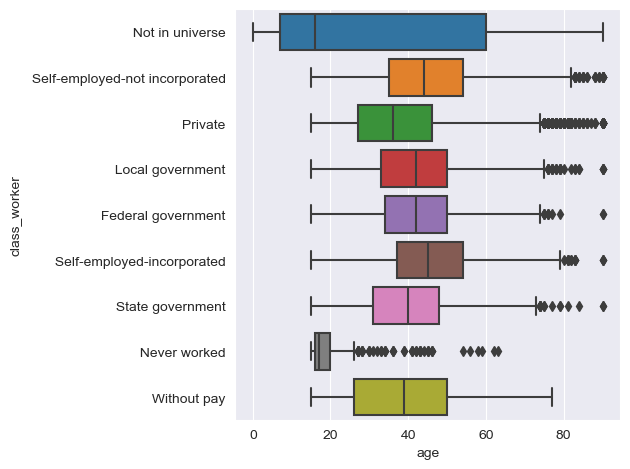

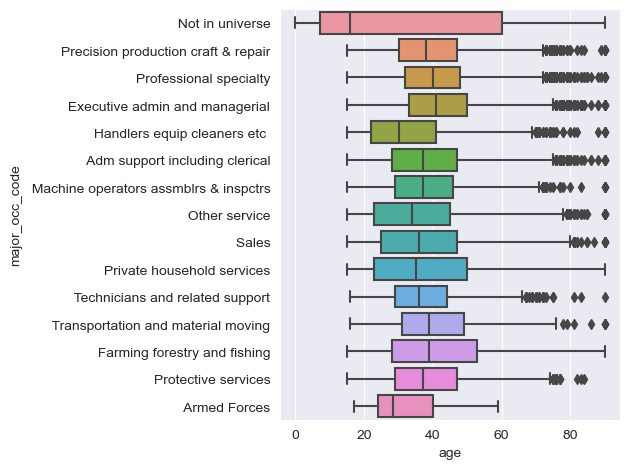

In [24]:
sns.boxplot(x=df['age'], y=df['class_worker'])
plt.tight_layout()
plt.show()
sns.boxplot(x=df['age'], y=df['major_occ_code'])
plt.tight_layout()
plt.show()

#### As above figure showed, we found that if a person has **age<16**, then he must in 'Not in Universe', hence we drop the cases whose age<16

In [25]:
df_filter_age = df[df['age'] > 16]

In [26]:
work_related_df2 = df_filter_age[df_filter_age['class_worker'] == ' Not in universe']
work_related_df2 = work_related_df2[['age'] + work_related_list + ['full_or_part_emp'] + ['income_50k']]
work_related_df2

,age,class_worker,major_ind_code,major_occ_code,full_or_part_emp,income_50k
0,73,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000
2,18,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000
11,32,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000
17,39,Not in universe,Not in universe or children,Not in universe,Children or Armed Forces,-50000
24,55,Not in universe,Not in universe or children,Not in universe,Children or Armed Forces,-50000
...,...,...,...,...,...,...
199485,90,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000
199512,71,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000
199515,87,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000
199518,87,Not in universe,Not in universe or children,Not in universe,Not in labor force,-50000


In [27]:
work_related_df2.nunique()

age                 74
class_worker         1
major_ind_code       1
major_occ_code       1
full_or_part_emp     2
income_50k           2
dtype: int64

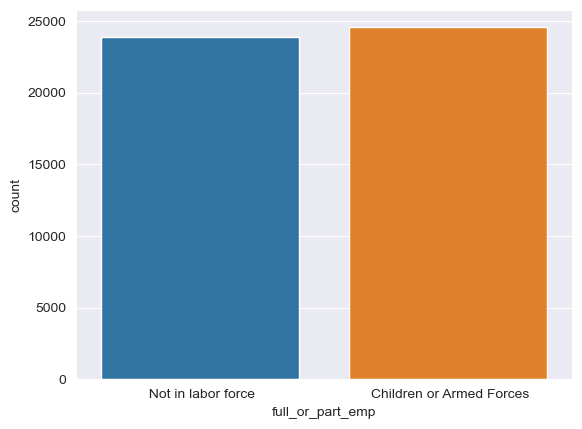

In [28]:
sns.countplot(x="full_or_part_emp", data=work_related_df2)
plt.show()

#### From above analysis, we found that the people(not children) who are not in labor force or armed fored, did not make an over-50k-income. Hence we shall keep them as another class

In [29]:
df

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,...,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,Not in universe,High school graduate,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,...,34,0,0,0,0,1,0,2,52,94
2,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
3,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,...,0,0,0,0,0,0,0,0,0,94
4,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,...,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in labor force,Joint both 65+,...,0,0,0,0,0,0,0,2,0,95
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,...,2,0,6418,0,9,1,0,2,52,94
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Children or Armed Forces,Joint both under 65,...,0,0,0,0,157,6,0,2,52,95
199521,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95


In [30]:
df_filter_age

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,...,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,Not in universe,High school graduate,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,...,34,0,0,0,0,1,0,2,52,94
2,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
5,Private,Some college but no degree,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,Full-time schedules,Joint both under 65,...,10,1200,0,0,0,1,2,2,52,95
6,Private,Bachelors degree(BA AB BS),Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint both under 65,...,3,0,5178,0,0,6,0,2,52,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199517,Private,Bachelors degree(BA AB BS),Never married,Education,Adm support including clerical,Other,Mexican-American,Male,Full-time schedules,Single,...,26,0,6849,0,0,6,2,2,52,95
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in labor force,Joint both 65+,...,0,0,0,0,0,0,0,2,0,95
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,...,2,0,6418,0,9,1,0,2,52,94
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Children or Armed Forces,Joint both under 65,...,0,0,0,0,157,6,0,2,52,95


### Inspection of some insignificant features

In [31]:
df[df['income_50k'] == ' 50000+.']

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,...,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
57,Self-employed-incorporated,Some college but no degree,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Full-time schedules,Joint both under 65,...,2,0,0,0,0,2,0,2,52,95
64,Private,12th grade no diploma,Married-civilian spouse present,Utilities and sanitary services,Precision production craft & repair,White,All other,Male,Full-time schedules,Joint both under 65,...,33,0,0,0,0,6,0,2,52,95
68,Private,Associates degree-occup /vocational,Separated,Communications,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Single,...,33,0,0,2444,10000,6,0,2,52,94
80,Self-employed-not incorporated,Prof school degree (MD DDS DVM LLB JD),Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,Full-time schedules,Joint both under 65,...,17,0,0,0,0,1,0,2,52,95
88,Not in universe,High school graduate,Married-civilian spouse present,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Male,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199474,Self-employed-not incorporated,Bachelors degree(BA AB BS),Married-spouse absent,Finance insurance and real estate,Executive admin and managerial,Black,All other,Male,Children or Armed Forces,Single,...,2,0,0,0,0,1,0,2,50,94
199487,Private,Bachelors degree(BA AB BS),Married-civilian spouse present,Utilities and sanitary services,Executive admin and managerial,White,All other,Male,Full-time schedules,Joint both under 65,...,2,0,0,0,0,6,0,2,52,95
199499,Private,Bachelors degree(BA AB BS),Married-civilian spouse present,Manufacturing-nondurable goods,Executive admin and managerial,White,All other,Female,Full-time schedules,Joint one under 65 & one 65+,...,2,0,0,0,0,2,0,2,52,95
199508,Private,Some college but no degree,Married-spouse absent,Construction,Executive admin and managerial,White,All other,Male,Full-time schedules,Single,...,2,0,0,0,0,6,2,1,52,95


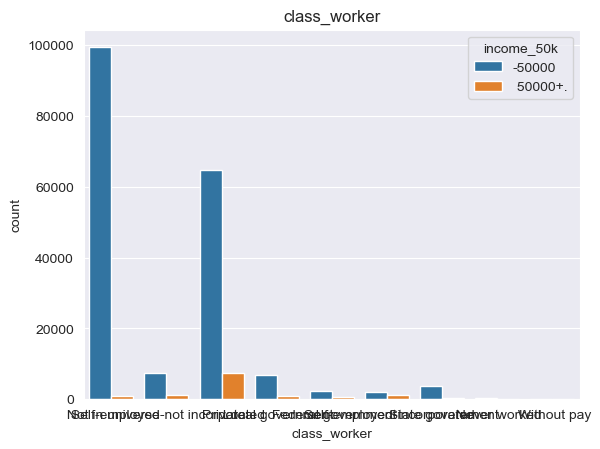

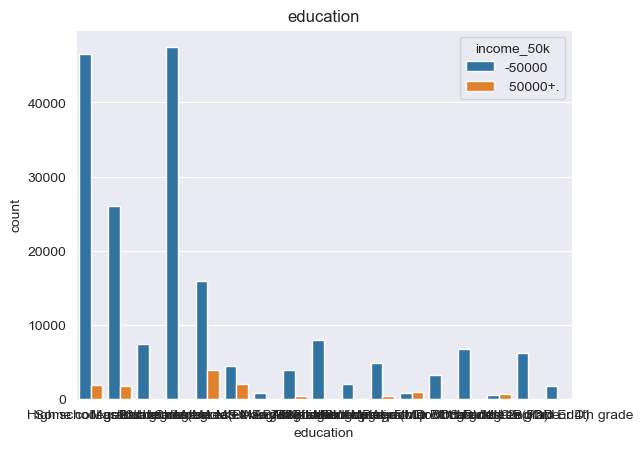

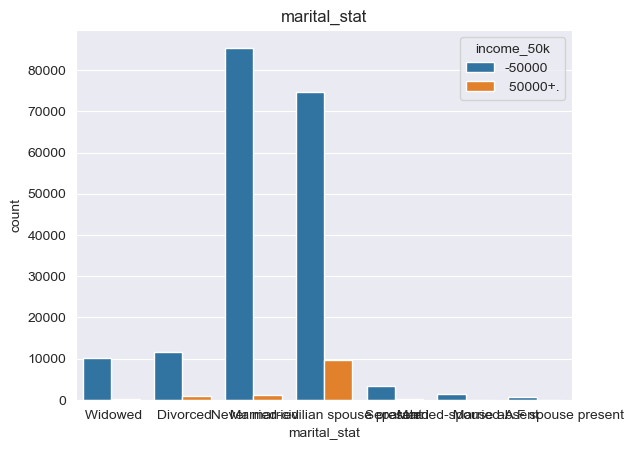

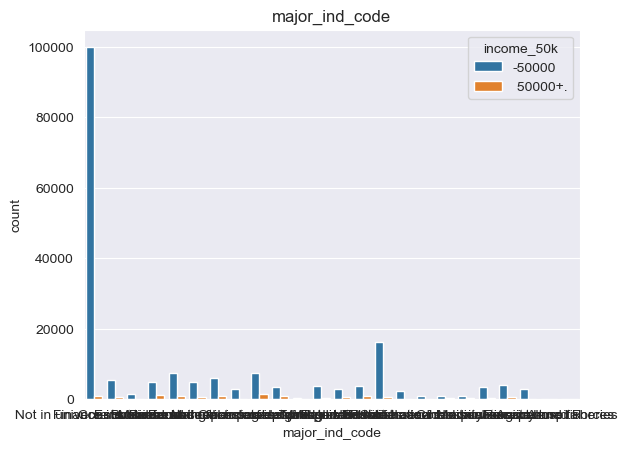

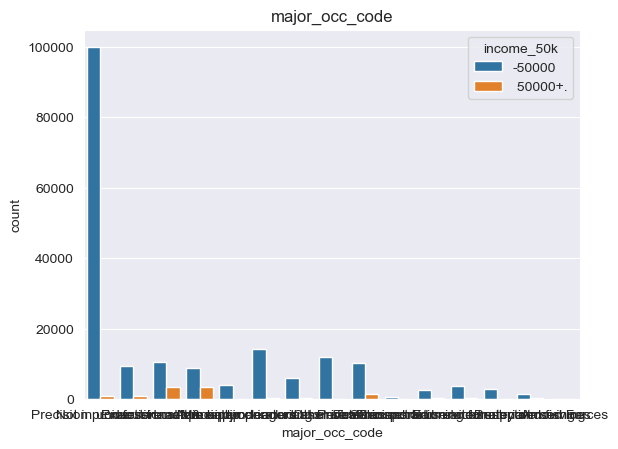

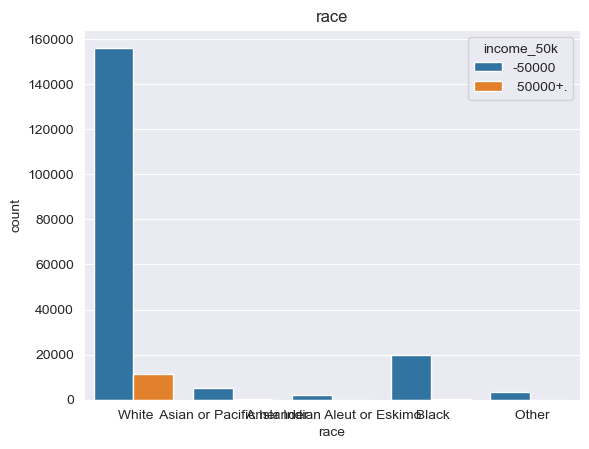

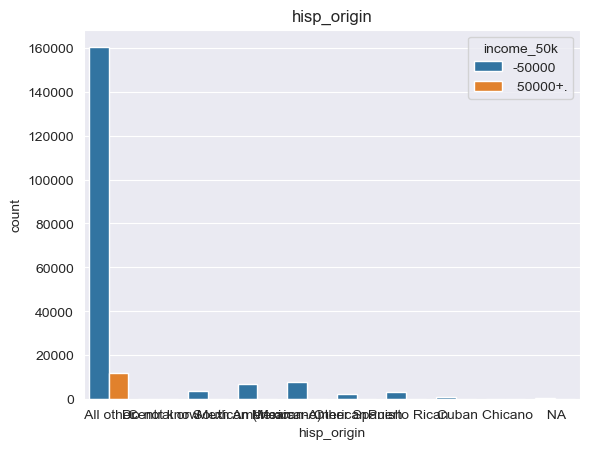

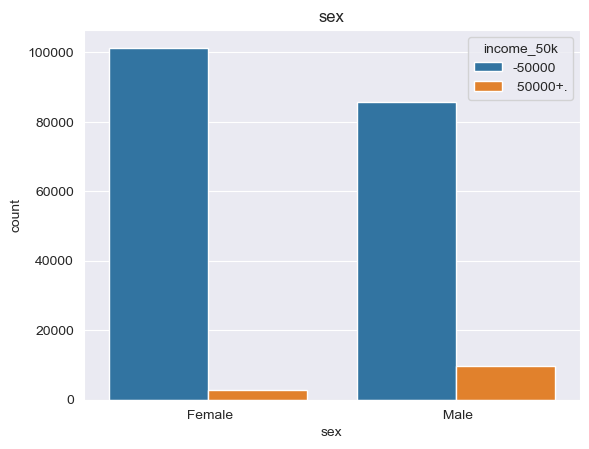

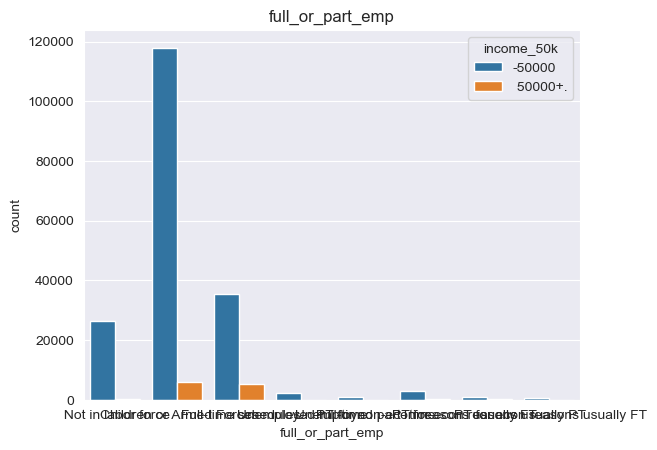

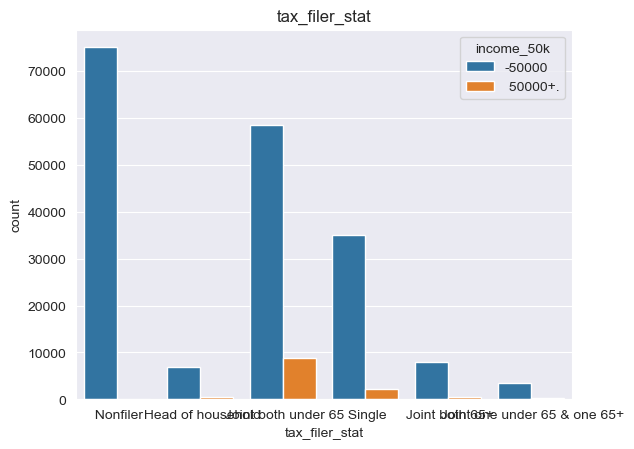

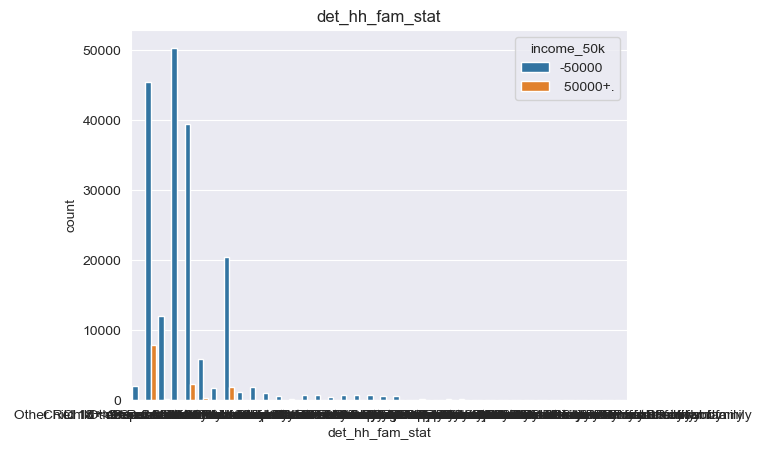

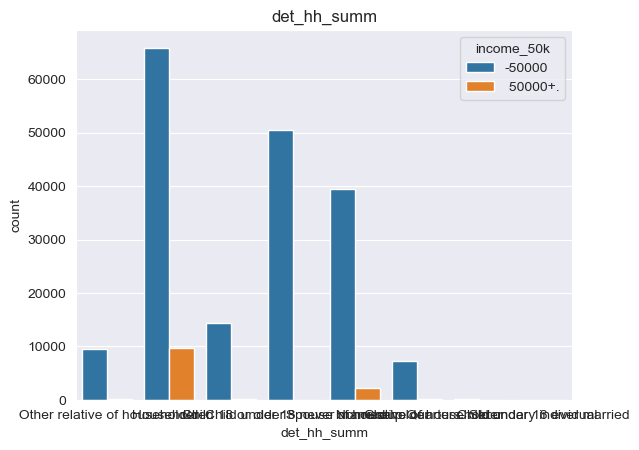

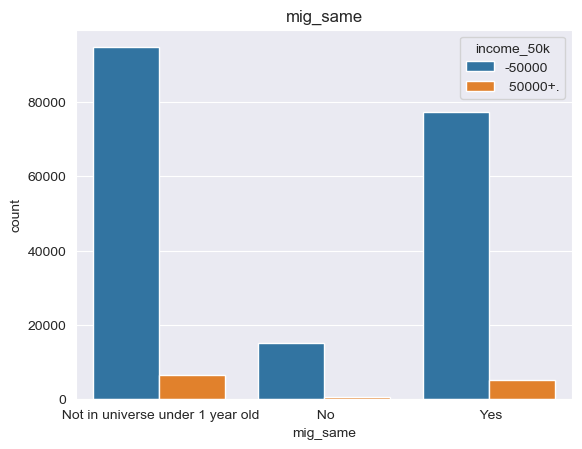

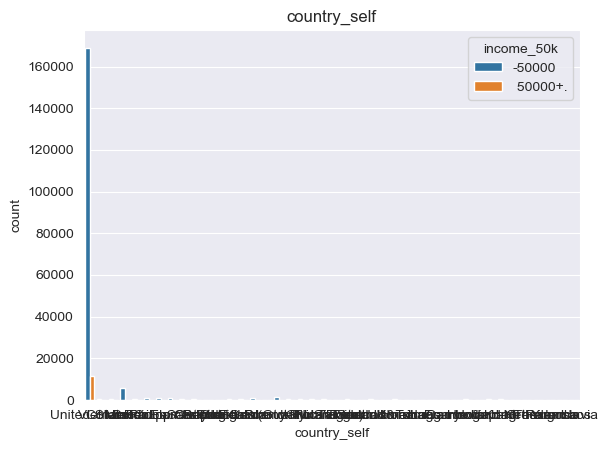

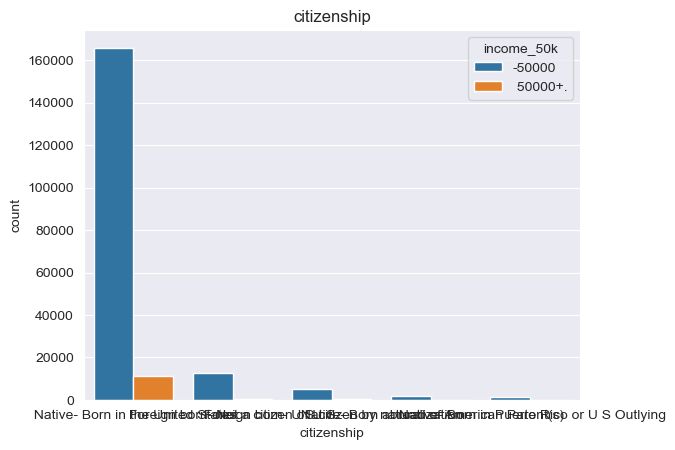

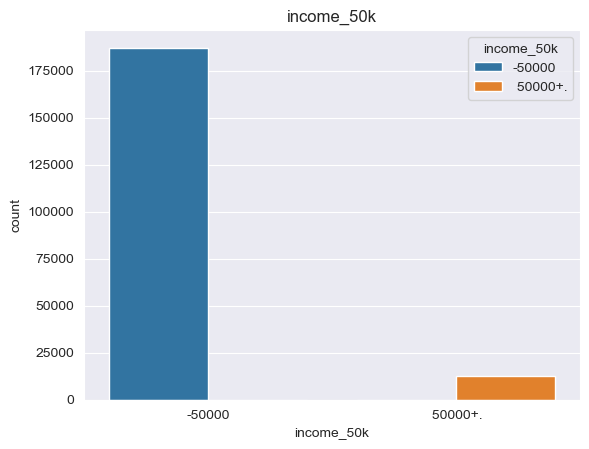

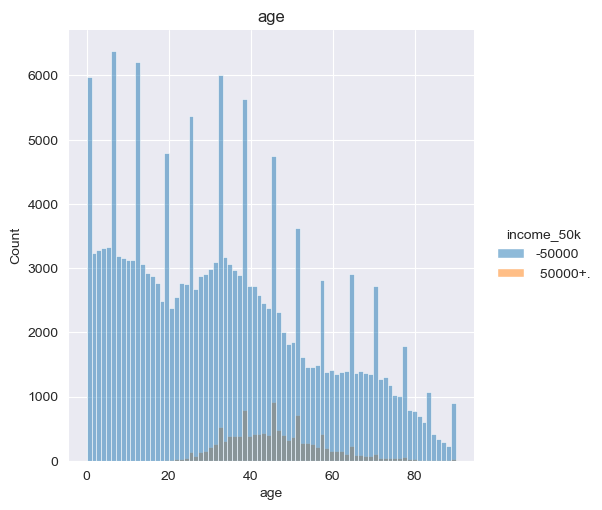

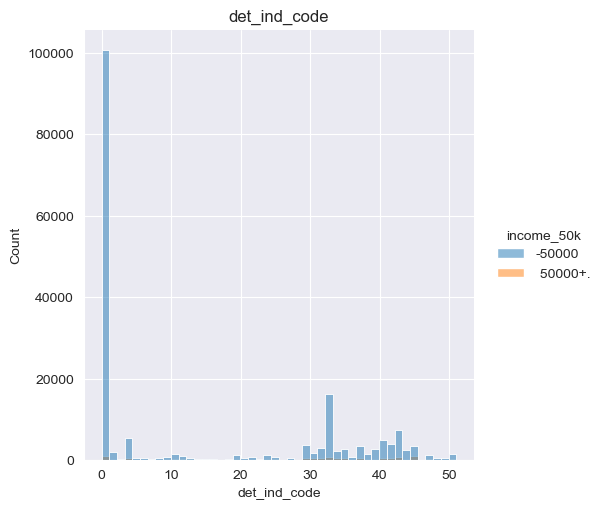

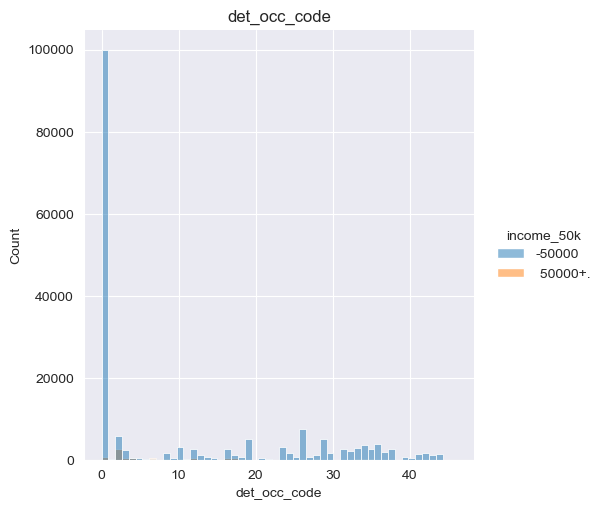

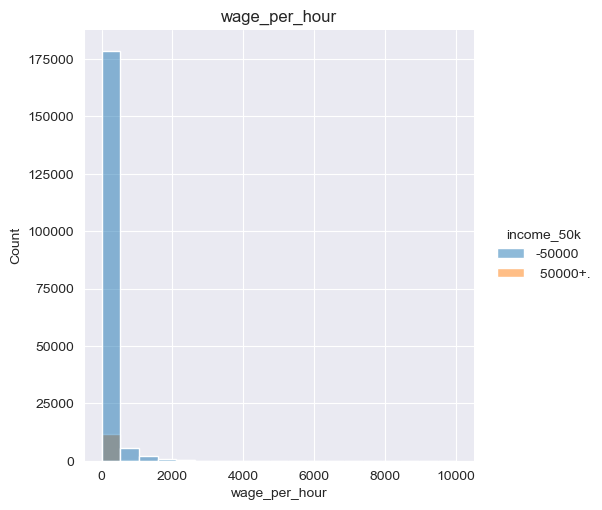

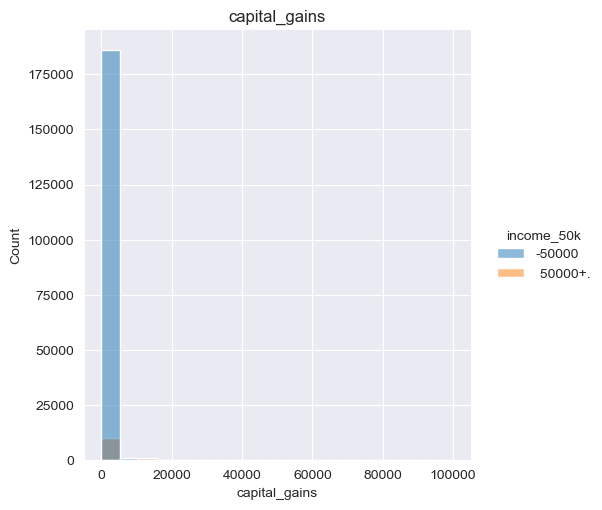

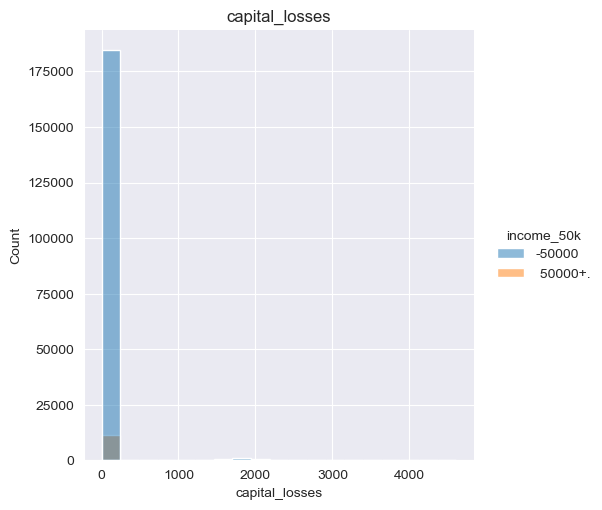

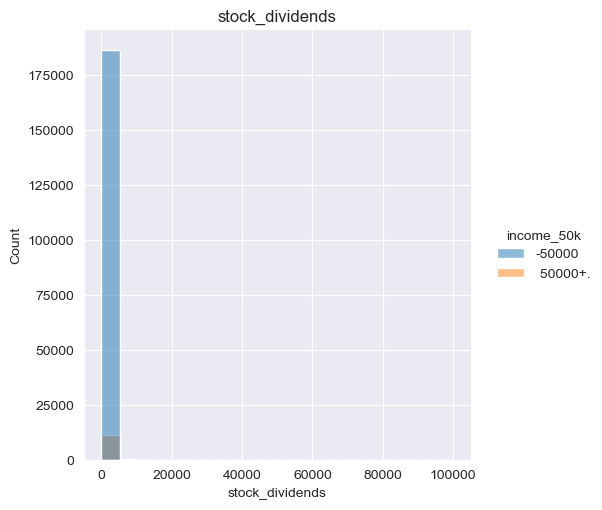

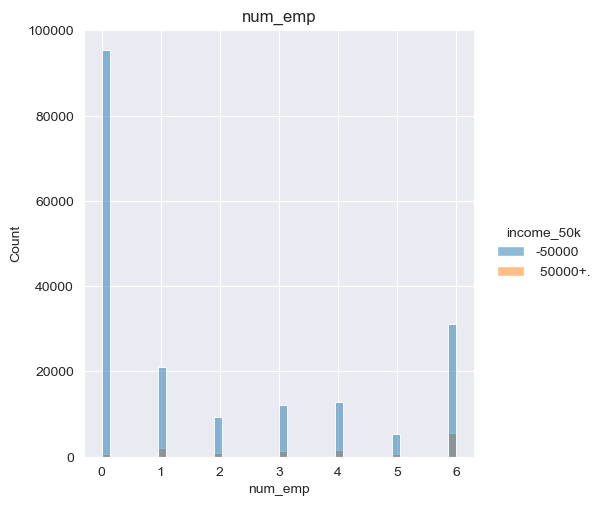

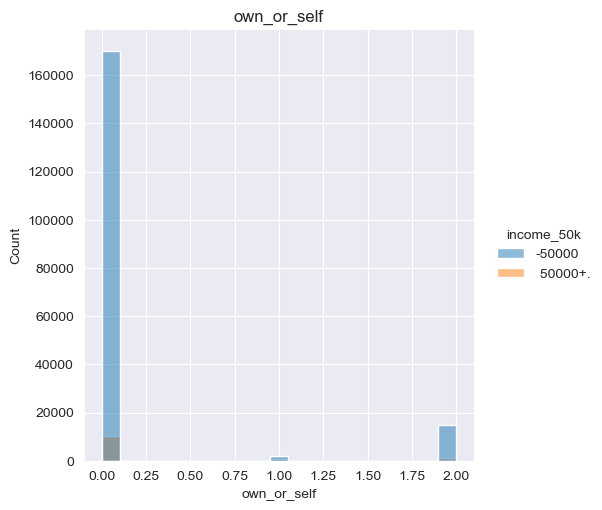

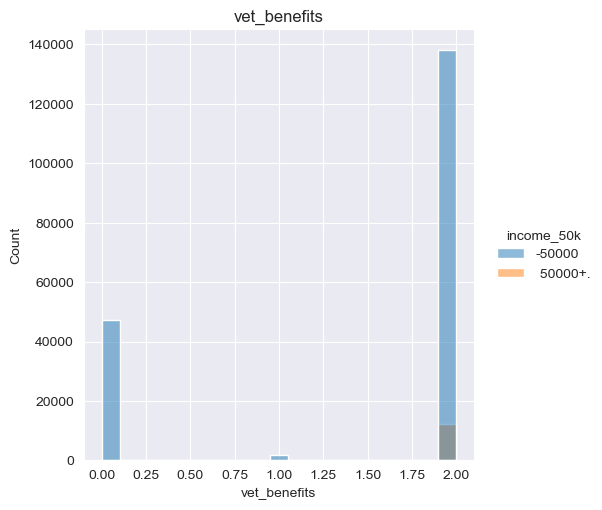

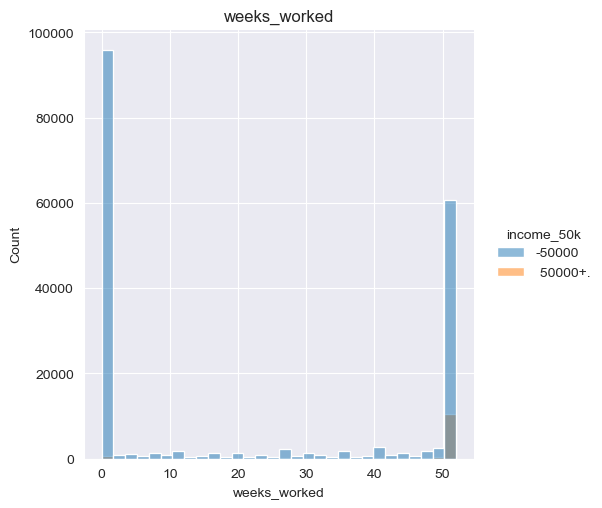

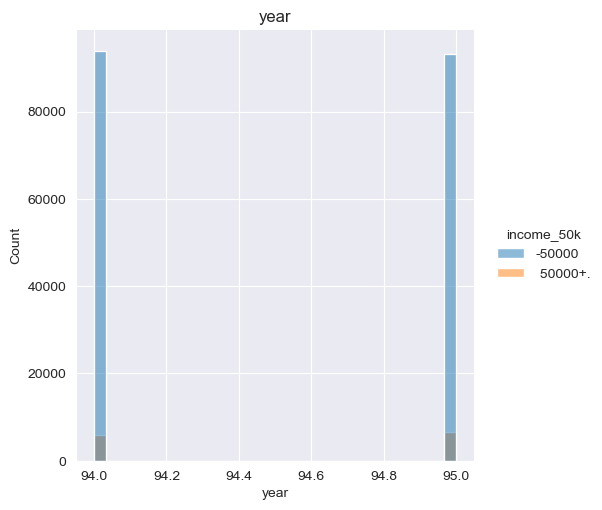

In [32]:
for col in df.columns.tolist():
    if col in cat_cols:
        sns.countplot(x=col, hue='income_50k', data=df)
        plt.title(col)
        plt.show()
    else:
        sns.displot(data=df, x=col, hue='income_50k')
        plt.title(col)
        plt.show()


In [33]:
df

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,...,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,Not in universe,High school graduate,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,...,34,0,0,0,0,1,0,2,52,94
2,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95
3,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,...,0,0,0,0,0,0,0,0,0,94
4,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,...,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in labor force,Joint both 65+,...,0,0,0,0,0,0,0,2,0,95
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,...,2,0,6418,0,9,1,0,2,52,94
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Children or Armed Forces,Joint both under 65,...,0,0,0,0,157,6,0,2,52,95
199521,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,...,0,0,0,0,0,0,0,2,0,95


## Handling continuous data, is there some outliers?

In [34]:
df_cont = df[num_cols]
df_cont

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,73,0,0,0,0,0,0,0,0,2,0,95
1,58,4,34,0,0,0,0,1,0,2,52,94
2,18,0,0,0,0,0,0,0,0,2,0,95
3,9,0,0,0,0,0,0,0,0,0,0,94
4,10,0,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,0,0,2,0,95
199519,65,37,2,0,6418,0,9,1,0,2,52,94
199520,47,0,0,0,0,0,157,6,0,2,52,95
199521,16,0,0,0,0,0,0,0,0,2,0,95


In [35]:
def drop_outliers(df, z_thresh):
    """
    Identify and drop outliers in a dataframe based on the z-score method
    """
    df_copy = df.copy()
    z_scores = df_copy.apply(lambda x: np.abs((x - x.mean()) / x.std()))
    df_copy = df_copy[(z_scores < z_thresh).all(axis=1)]
    return df_copy

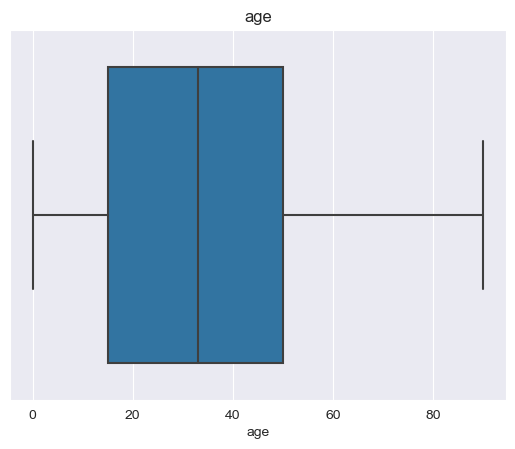

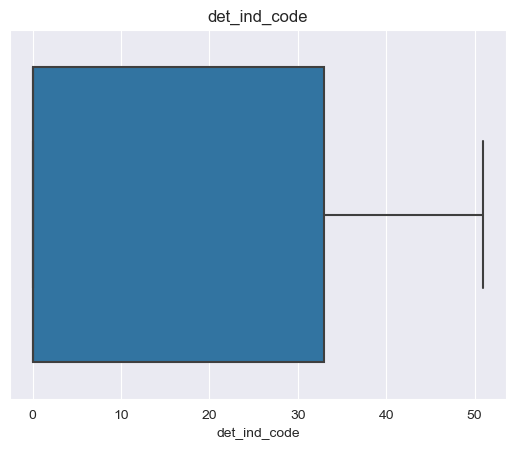

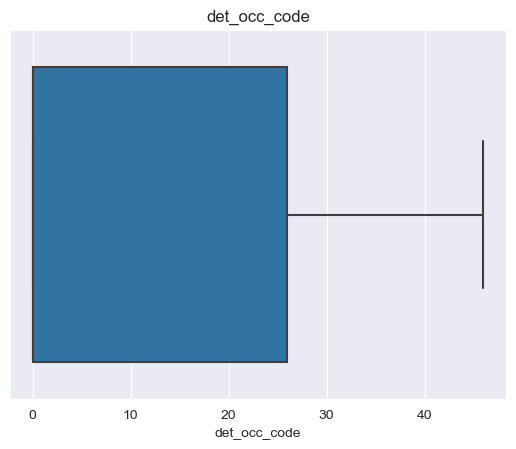

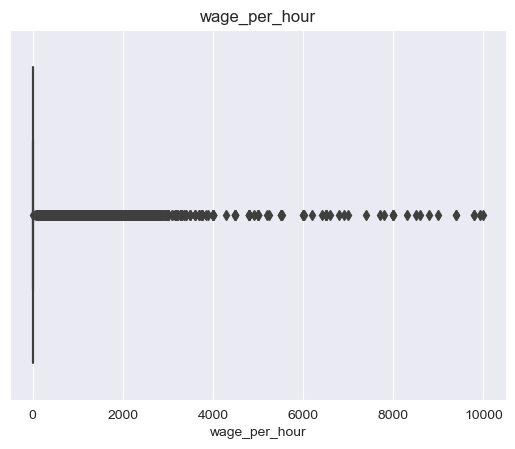

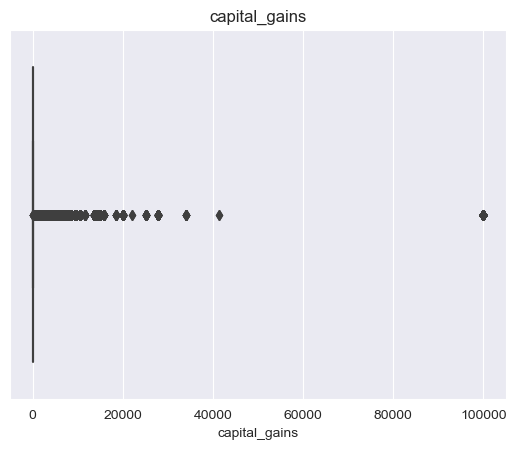

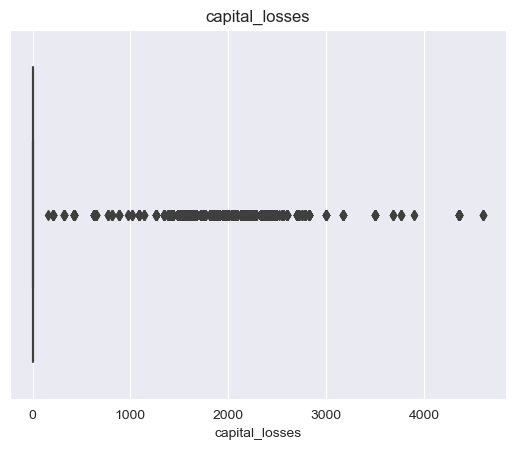

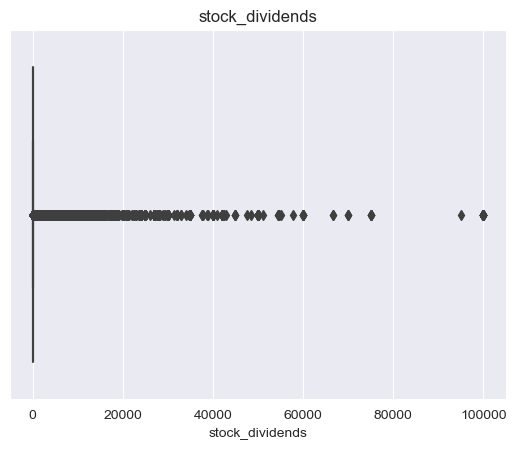

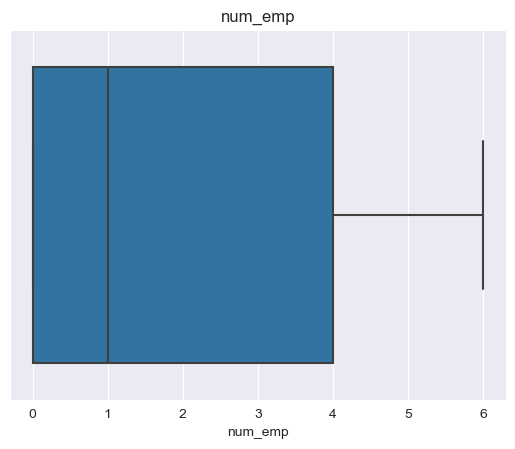

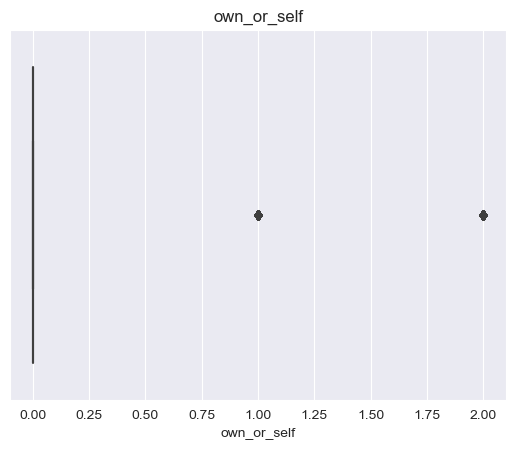

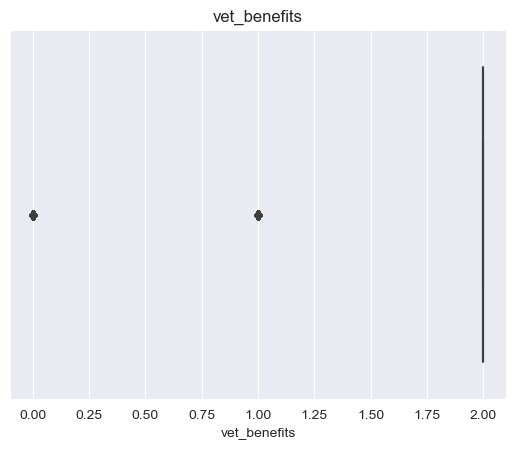

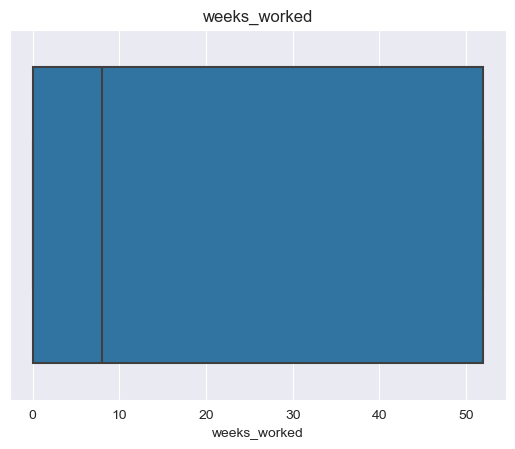

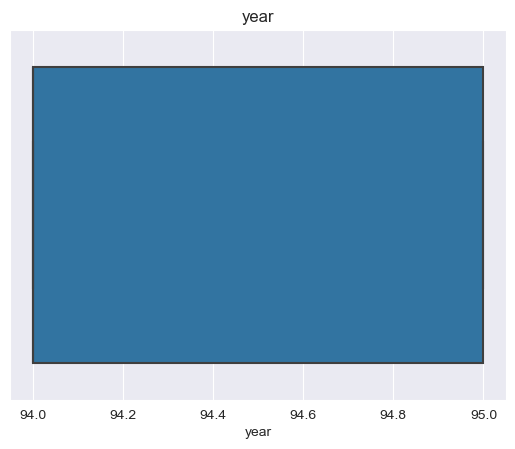

In [36]:
for col in df_cont.columns.tolist():
    sns.boxplot(data=df_cont, x=col)
    plt.title(col)
    plt.show()


In [37]:
df_copy = drop_outliers(df_cont, z_thresh=5)
df_copy

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,73,0,0,0,0,0,0,0,0,2,0,95
1,58,4,34,0,0,0,0,1,0,2,52,94
2,18,0,0,0,0,0,0,0,0,2,0,95
3,9,0,0,0,0,0,0,0,0,0,0,94
4,10,0,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,0,0,2,0,95
199519,65,37,2,0,6418,0,9,1,0,2,52,94
199520,47,0,0,0,0,0,157,6,0,2,52,95
199521,16,0,0,0,0,0,0,0,0,2,0,95


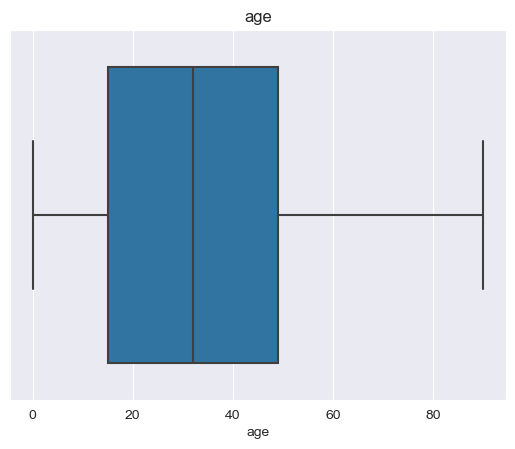

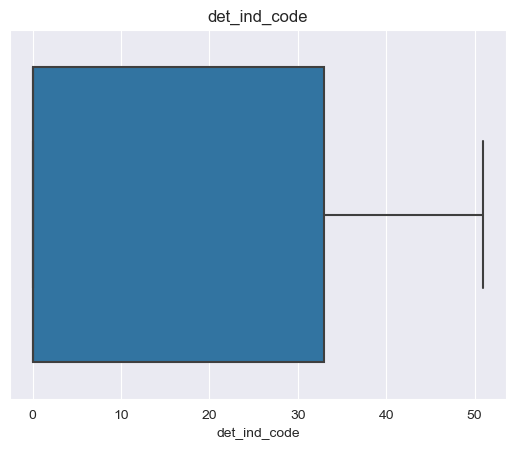

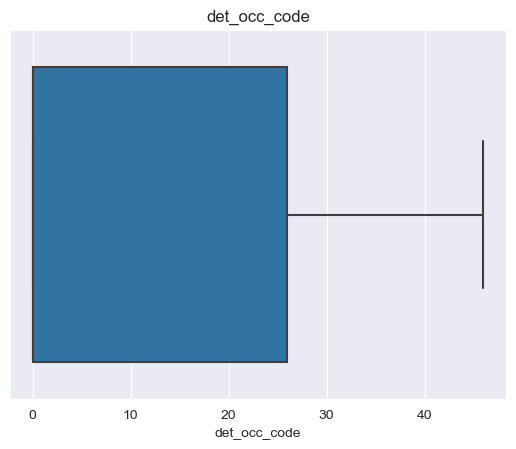

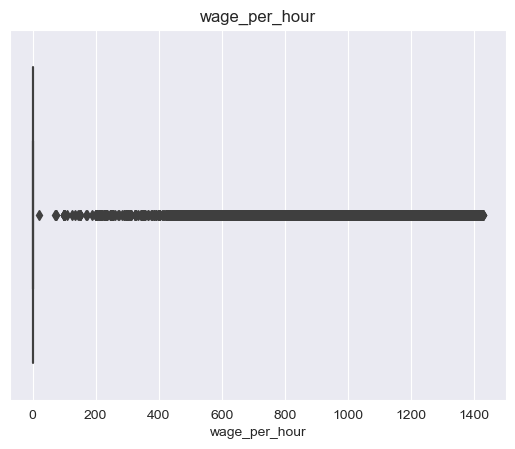

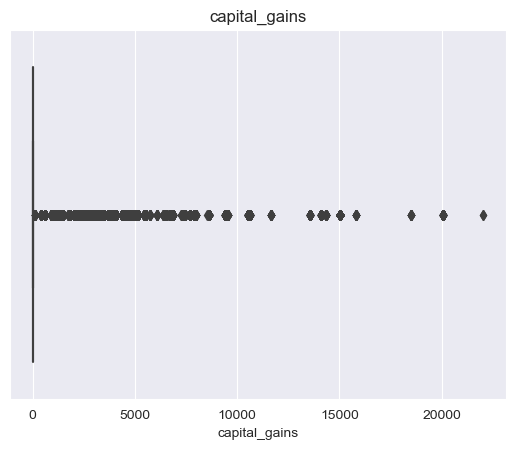

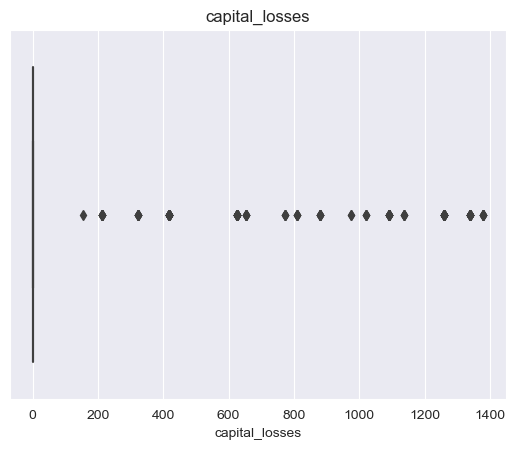

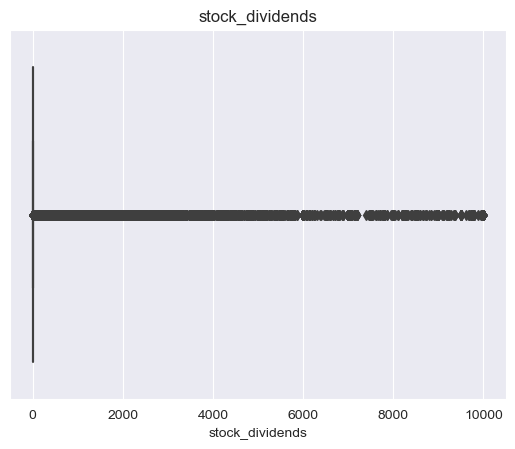

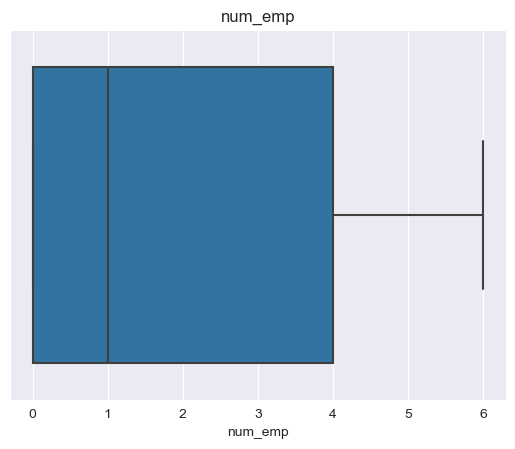

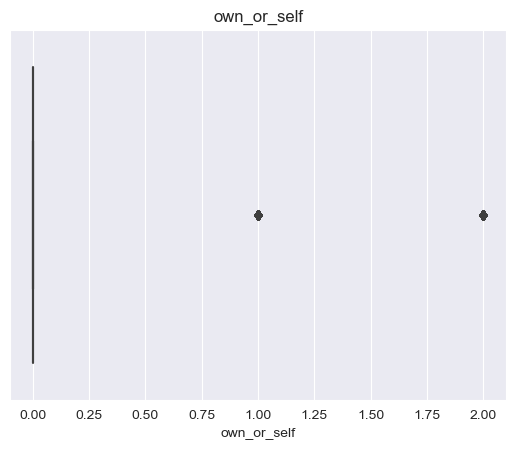

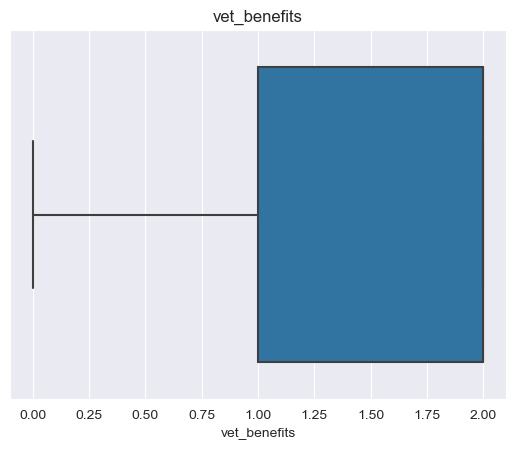

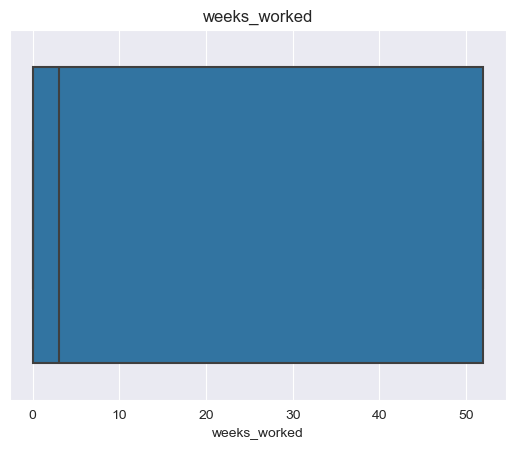

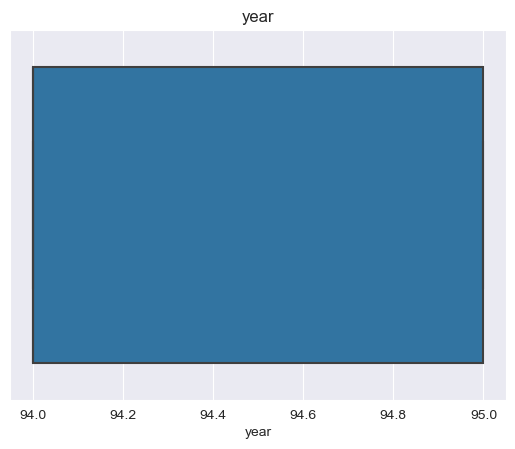

In [38]:
for col in df_copy.columns.tolist():
    sns.boxplot(data=df_copy, x=col)
    plt.title(col)
    plt.show()

In [39]:
cat_cols_new = df.select_dtypes(include=['object']).columns
num_cols_new = df.select_dtypes(include=['number']).columns

In [40]:
cat_cols_new

Index(['class_worker', 'education', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'full_or_part_emp',
       'tax_filer_stat', 'det_hh_fam_stat', 'det_hh_summ', 'mig_same',
       'country_self', 'citizenship', 'income_50k'],
      dtype='object')

In [41]:
num_cols_new

Index(['age', 'det_ind_code', 'det_occ_code', 'wage_per_hour', 'capital_gains',
       'capital_losses', 'stock_dividends', 'num_emp', 'own_or_self',
       'vet_benefits', 'weeks_worked', 'year'],
      dtype='object')

### Since some columns may provide same information, so we need to identify which colunms should be dropped, by determining there correlation with Cramer's V

* From the context, we find "det_ind_code" and "det_occ_code" in continuous features, representing the industry and occupation code, which are similar to the 'major_ind_code', 'major_occ_code' in categorical features, then we may only keep the categorical representation.

In [42]:
num_cols_new = list(set(num_cols_new.tolist()) - {'det_ind_code', 'det_occ_code'})

In [43]:
df[num_cols_new].nunique()

own_or_self           3
weeks_worked         53
stock_dividends    1478
age                  91
capital_gains       132
num_emp               7
vet_benefits          3
capital_losses      113
year                  2
wage_per_hour      1240
dtype: int64

* Then we inspect the correlation between other features

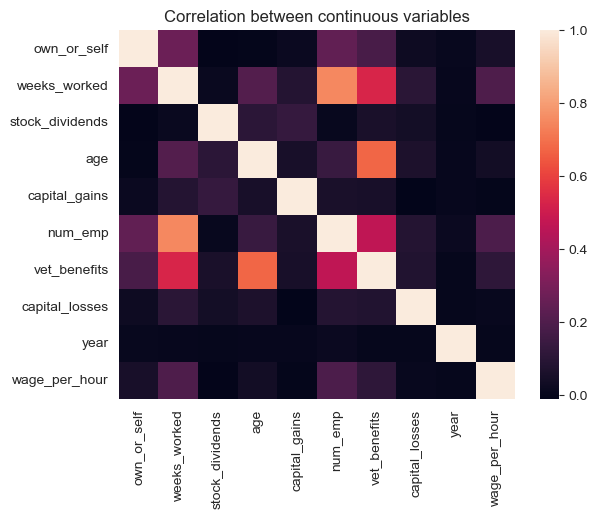

In [44]:
corr_num = df[num_cols_new].corr()
sns.heatmap(corr_num)
plt.title('Correlation between continuous variables')
plt.show()

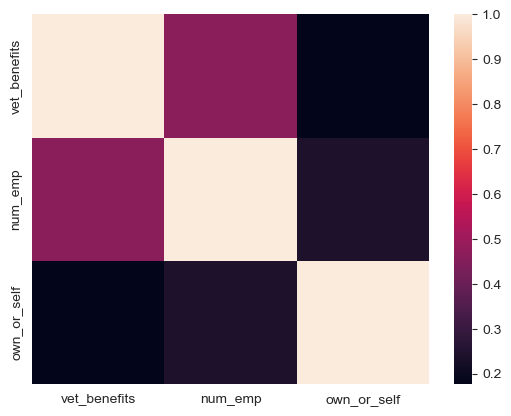

In [45]:
corr_num_helper1 = df[['vet_benefits', 'num_emp', 'own_or_self']].corr()
sns.heatmap(corr_num_helper1)
plt.show()

* From the heatmap, we found that the "vet_benefits" has high correlation with the "age" and "num_emp", then we shall drop this variable
* "num_emp" to be determined LATER!!!


In [46]:
num_cols_new2 = list(set(num_cols_new) - {'vet_benefits'})
num_cols_new2

['own_or_self',
 'wage_per_hour',
 'stock_dividends',
 'num_emp',
 'age',
 'capital_gains',
 'year',
 'capital_losses',
 'weeks_worked']

### Now we may deal with the categorical variables.

In [47]:
df_cate_new = df[cat_cols_new]
df_cate_new

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,det_hh_fam_stat,det_hh_summ,mig_same,country_self,citizenship,income_50k
0,Not in universe,High school graduate,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,United-States,Native- Born in the United States,-50000
1,Self-employed-not incorporated,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,All other,Male,Children or Armed Forces,Head of household,Householder,Householder,No,United-States,Native- Born in the United States,-50000
2,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Vietnam,Foreign born- Not a citizen of U S,-50000
3,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,United-States,Native- Born in the United States,-50000
4,Not in universe,Children,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,United-States,Native- Born in the United States,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in labor force,Joint both 65+,Householder,Householder,Not in universe under 1 year old,United-States,Native- Born in the United States,-50000
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Householder,Yes,United-States,Native- Born in the United States,-50000
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Children or Armed Forces,Joint both under 65,Householder,Householder,Not in universe under 1 year old,Germany,Foreign born- U S citizen by naturalization,-50000
199521,Not in universe,10th grade,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in labor force,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,United-States,Native- Born in the United States,-50000


In [48]:
from scipy.stats import chi2_contingency


# Define a function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [49]:
corr_cate = np.zeros((len(df_cate_new.columns), len(df_cate_new.columns)))
for i, col1 in enumerate(df_cate_new.columns):
    for j, col2 in enumerate(df_cate_new.columns):
        corr_cate[i, j] = cramers_v(df_cate_new[col1], df_cate_new[col2])

corr_df = pd.DataFrame(corr_cate, columns=df_cate_new.columns, index=df_cate_new.columns)

# Print the correlation matrix
corr_df

,class_worker,education,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,full_or_part_emp,tax_filer_stat,det_hh_fam_stat,det_hh_summ,mig_same,country_self,citizenship,income_50k
class_worker,1.000000,0.236447,0.178125,0.486986,0.397387,0.049074,0.032702,0.125398,0.252197,0.335002,0.209239,0.213373,0.039956,0.039522,0.044499,0.260455
education,0.236447,1.000000,0.284744,0.189509,0.229915,0.074516,0.113478,0.081236,0.190338,0.354703,0.239926,0.345146,0.026792,0.107976,0.164880,0.389735
marital_stat,0.178125,0.284744,1.000000,0.181763,0.182810,0.080542,0.050957,0.170431,0.139136,0.469948,0.475599,0.384310,0.062076,0.063019,0.076929,0.197579
major_ind_code,0.486986,0.189509,0.181763,1.000000,0.588004,0.050911,0.044803,0.290080,0.239845,0.337445,0.129484,0.223337,0.035889,0.038770,0.060201,0.277653
major_occ_code,0.397387,0.229915,0.182810,0.588004,1.000000,0.055657,0.053566,0.333431,0.239064,0.338660,0.168345,0.226172,0.030989,0.054978,0.068412,0.366169
race,0.049074,0.074516,0.080542,0.050911,0.055657,1.000000,0.153056,0.022067,0.025786,0.084601,0.087960,0.070963,0.045076,0.376470,0.176591,0.058566
hisp_origin,0.032702,0.113478,0.050957,0.044803,0.053566,0.153056,1.000000,0.012544,0.024444,0.055657,0.065016,0.053226,0.041680,0.486562,0.404547,0.068279
sex,0.125398,0.081236,0.170431,0.290080,0.333431,0.022067,0.012544,0.999990,0.105640,0.113626,0.412278,0.369108,0.005243,0.027738,0.014681,0.157574
full_or_part_emp,0.252197,0.190338,0.139136,0.239845,0.239064,0.025786,0.024444,0.105640,1.000000,0.208033,0.157184,0.146258,0.545184,0.030912,0.037549,0.159738
tax_filer_stat,0.335002,0.354703,0.469948,0.337445,0.338660,0.084601,0.055657,0.113626,0.208033,1.000000,0.533065,0.428212,0.056852,0.051460,0.052258,0.229178


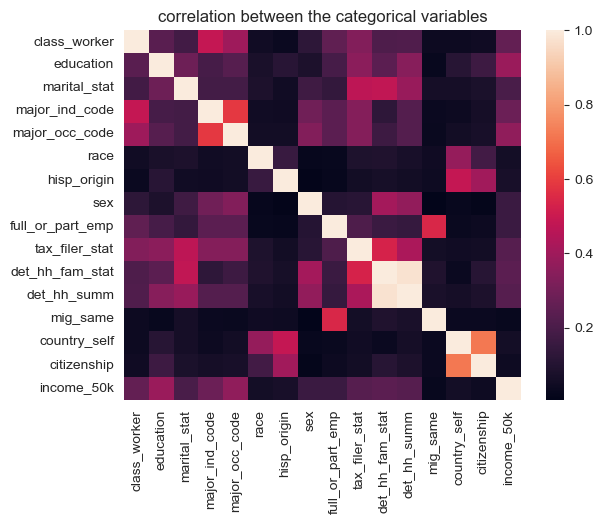

In [50]:
sns.heatmap(corr_df)
plt.title('correlation between the categorical variables')
plt.show()

#### Noticed that "major_ind_code" and "major_occ_code" have high correlation, "major_occ_code" has less classes, then we may drop "major_ind_code".

#### Noticed that "det_hh_fam_stat" and "det_hh_summ" have high correlation, "det_hh_summ" has less classes, then we may drop "det_hh_fam_stat".

#### Noticed that "country_self" and "citizenship" have high correlation, "citizenship" has less classes, then we may drop "country_self".



In [51]:
df[cat_cols_new].nunique()

class_worker         9
education           17
marital_stat         7
major_ind_code      24
major_occ_code      15
race                 5
hisp_origin         10
sex                  2
full_or_part_emp     8
tax_filer_stat       6
det_hh_fam_stat     38
det_hh_summ          8
mig_same             3
country_self        42
citizenship          5
income_50k           2
dtype: int64

In [52]:
cat_cols_new2 = list(set(cat_cols_new.tolist()) - {'major_ind_code', 'det_hh_fam_stat', 'country_self'})
cat_cols_new2

['citizenship',
 'full_or_part_emp',
 'income_50k',
 'class_worker',
 'tax_filer_stat',
 'mig_same',
 'race',
 'sex',
 'education',
 'det_hh_summ',
 'marital_stat',
 'hisp_origin',
 'major_occ_code']

In [53]:
all_cols_new = num_cols_new2 + cat_cols_new2
all_cols_new

['own_or_self',
 'wage_per_hour',
 'stock_dividends',
 'num_emp',
 'age',
 'capital_gains',
 'year',
 'capital_losses',
 'weeks_worked',
 'citizenship',
 'full_or_part_emp',
 'income_50k',
 'class_worker',
 'tax_filer_stat',
 'mig_same',
 'race',
 'sex',
 'education',
 'det_hh_summ',
 'marital_stat',
 'hisp_origin',
 'major_occ_code']

In [54]:
df_all_new = df[all_cols_new]
df_all_new

,own_or_self,wage_per_hour,stock_dividends,num_emp,age,capital_gains,year,capital_losses,weeks_worked,citizenship,...,class_worker,tax_filer_stat,mig_same,race,sex,education,det_hh_summ,marital_stat,hisp_origin,major_occ_code
0,0,0,0,0,73,0,95,0,0,Native- Born in the United States,...,Not in universe,Nonfiler,Not in universe under 1 year old,White,Female,High school graduate,Other relative of householder,Widowed,All other,Not in universe
1,0,0,0,1,58,0,94,0,52,Native- Born in the United States,...,Self-employed-not incorporated,Head of household,No,White,Male,Some college but no degree,Householder,Divorced,All other,Precision production craft & repair
2,0,0,0,0,18,0,95,0,0,Foreign born- Not a citizen of U S,...,Not in universe,Nonfiler,Not in universe under 1 year old,Asian or Pacific Islander,Female,10th grade,Child 18 or older,Never married,All other,Not in universe
3,0,0,0,0,9,0,94,0,0,Native- Born in the United States,...,Not in universe,Nonfiler,Yes,White,Female,Children,Child under 18 never married,Never married,All other,Not in universe
4,0,0,0,0,10,0,94,0,0,Native- Born in the United States,...,Not in universe,Nonfiler,Yes,White,Female,Children,Child under 18 never married,Never married,All other,Not in universe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,0,87,0,95,0,0,Native- Born in the United States,...,Not in universe,Joint both 65+,Not in universe under 1 year old,White,Male,7th and 8th grade,Householder,Married-civilian spouse present,All other,Not in universe
199519,0,0,9,1,65,6418,94,0,52,Native- Born in the United States,...,Self-employed-incorporated,Joint one under 65 & one 65+,Yes,White,Male,11th grade,Householder,Married-civilian spouse present,All other,Executive admin and managerial
199520,0,0,157,6,47,0,95,0,52,Foreign born- U S citizen by naturalization,...,Not in universe,Joint both under 65,Not in universe under 1 year old,White,Male,Some college but no degree,Householder,Married-civilian spouse present,All other,Not in universe
199521,0,0,0,0,16,0,95,0,0,Native- Born in the United States,...,Not in universe,Nonfiler,Not in universe under 1 year old,White,Female,10th grade,Child under 18 never married,Never married,All other,Not in universe


In [55]:
df_all_new['hisp_origin'].unique()

array([' All other', ' Do not know', ' Central or South American',
       ' Mexican (Mexicano)', ' Mexican-American', ' Other Spanish',
       ' Puerto Rican', ' Cuban', ' Chicano', ' NA'], dtype=object)

### We indentify whether some categorical variables is highly imbalanced

In [71]:
from scipy.stats import entropy

imbalance_ratio_dict = {}
df_all_new_entrop_helper = df_all_new[cat_cols_new2]
for col in df_all_new_entrop_helper.columns:
    value_counts = df_all_new_entrop_helper[col].value_counts()
    target_entropy = entropy(value_counts, base=len(value_counts))
    max_entropy = entropy([1 / df_all_new_entrop_helper[col].nunique()] * df_all_new_entrop_helper[col].nunique(),
                          base=len(value_counts))
    imbalance_ratio_dict[col] = max_entropy/ target_entropy

# Print the entropy values
print(imbalance_ratio_dict)

{'citizenship': 3.4242045963884826, 'full_or_part_emp': 1.925797622900295, 'income_50k': 2.9800854900481166, 'class_worker': 1.8245789183939543, 'tax_filer_stat': 1.298535461868442, 'mig_same': 1.207214383464423, 'race': 2.6476749016222842, 'sex': 1.0012943431422694, 'education': 1.2791558197747708, 'det_hh_summ': 1.37634786380646, 'marital_stat': 1.6450858780394326, 'hisp_origin': 3.5380586133536833, 'major_occ_code': 1.4631049167500194}


In [72]:
imbalance_ratio_df = pd.DataFrame(data=imbalance_ratio_dict,index=['Imbalanced_Ratio']).T
imbalance_ratio_df.sort_values('Imbalanced_Ratio')

,Imbalanced_Ratio
sex,1.001294
mig_same,1.207214
education,1.279156
tax_filer_stat,1.298535
det_hh_summ,1.376348
major_occ_code,1.463105
marital_stat,1.645086
class_worker,1.824579
full_or_part_emp,1.925798
race,2.647675


### Noticed that "hisp_origin" has the higest imbanced ratio